In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('pokemons.csv')
df.set_index('Name', inplace=True)
df.drop('#', inplace=True, axis=1)
print(df)

                 Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Name                                                                            
Bulbasaur         Grass  Poison  45      49       49       65       65     45   
Ivysaur           Grass  Poison  60      62       63       80       80     60   
Venusaur          Grass  Poison  80      82       83      100      100     80   
Mega Venusaur     Grass  Poison  80     100      123      122      120     80   
Charmander         Fire     NaN  39      52       43       60       50     65   
...                 ...     ...  ..     ...      ...      ...      ...    ...   
Diancie            Rock   Fairy  50     100      150      100      150     50   
Mega Diancie       Rock   Fairy  50     160      110      160      110    110   
Hoopa Confined  Psychic   Ghost  80     110       60      150      130     70   
Hoopa Unbound   Psychic    Dark  80     160       60      170      130     80   
Volcanion          Fire   Wa

# Graph of Count vs Type 1

Text(0, 0.5, 'Count')

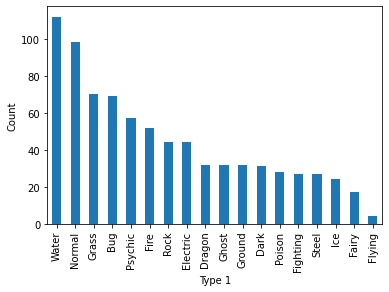

In [3]:
df['Type 1'].value_counts().plot(kind="bar")
plt.xlabel('Type 1')
plt.ylabel('Count')

# Graph of Count vs Type 2

Text(0, 0.5, 'Count')

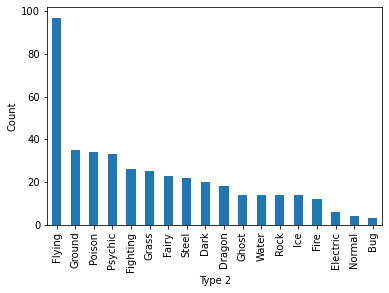

In [4]:
df['Type 2'].value_counts(ascending=False).plot(kind="bar")
plt.xlabel('Type 2')
plt.ylabel('Count')

# Graph of Attack vs Pokemon Variants( Type 1 & Type 2)

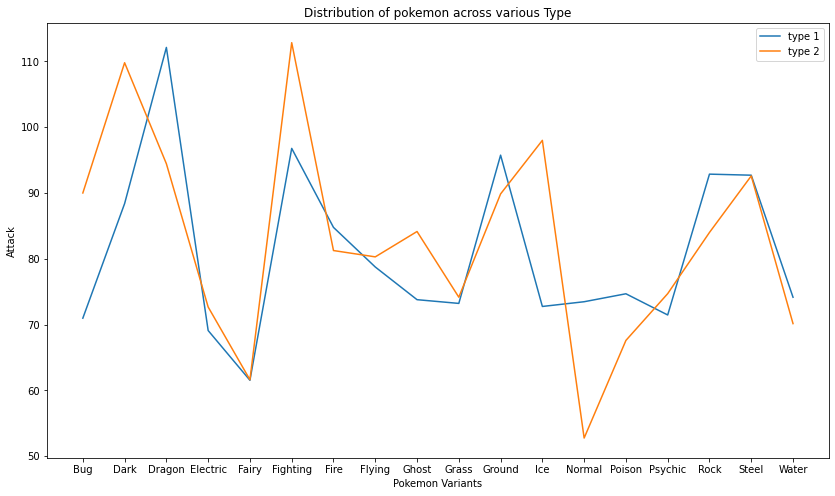

In [5]:
plt.figure(figsize=[14,8])
type_1 = df.groupby('Type 1')[['Attack']].mean()
type_2 = df.groupby('Type 2')[['Attack']].mean()
plt.xlabel("Pokemon Variants")
plt.ylabel("Attack")
plt.title("Distribution of pokemon across various Type")
plt.plot(type_1, label='type 1')
plt.plot(type_2, label='type 2')
plt.legend()

# Graph of Legendary vs Type 1

Text(0.5, 1.0, 'Stacked bar-chart with percentages')

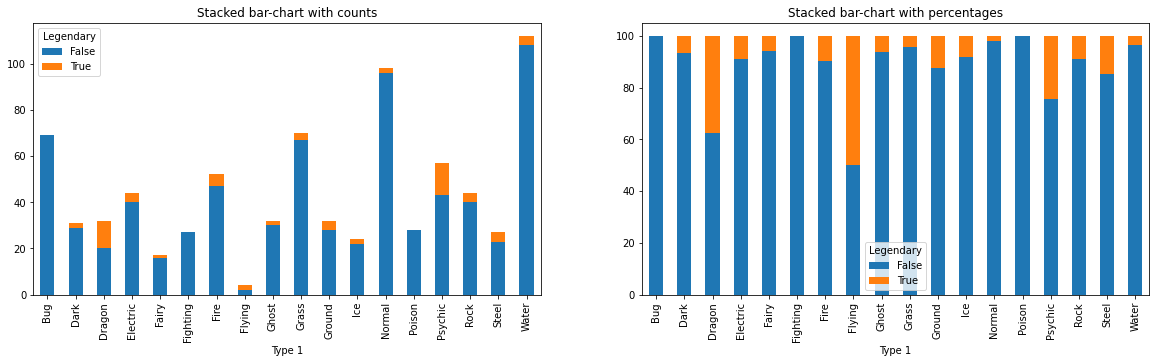

In [6]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,5))
res = df.groupby(['Type 1', 'Legendary']).size().unstack()
res.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('Stacked bar-chart with counts')
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')

# Graph of Legendary vs Generations

Text(0.5, 1.0, 'Stacked bar-chart with percentages')

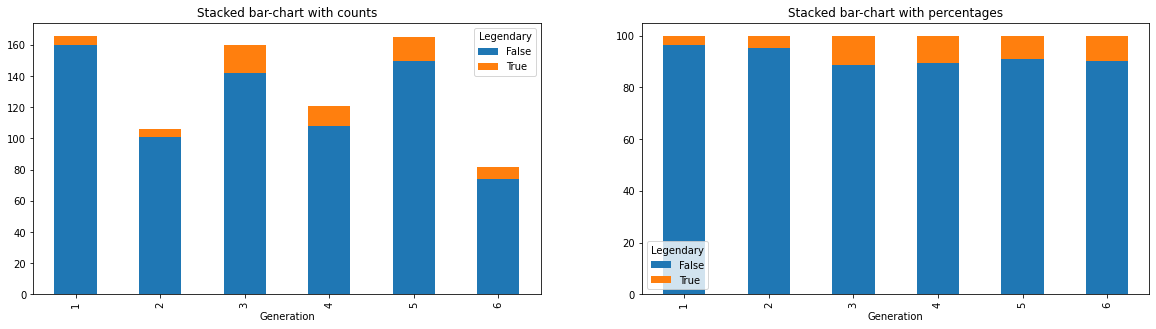

In [7]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,5))
res = df.groupby(['Generation', 'Legendary']).size().unstack()
res.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('Stacked bar-chart with counts')
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')

# Histogram of Attack Power of Dragon Type Pokemon

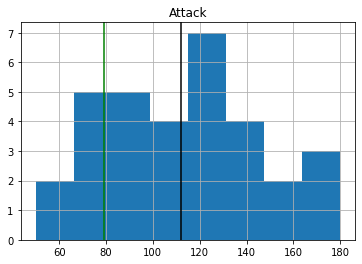

In [8]:
mean_attack = df['Attack'].mean()
dragon = df[df['Type 1'] == 'Dragon']
mean_dragon = dragon['Attack'].mean()
dragon.hist(column='Attack', bins=8)
plt.axvline(x=mean_attack, color='green')
plt.axvline(x=mean_dragon, color='black')

# Scatter Plot of Attack vs HP of Electric Type Pokemon

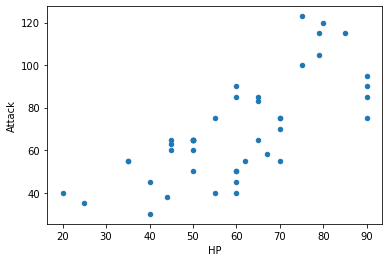

In [9]:
df[df['Type 1'] == 'Electric'].plot.scatter(x='HP', y='Attack')